In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
excel_path = '/Users/zhengyun/Desktop/yaojian/data/normalization/'
e0_name  = '铝块未归一化.csv'
e1_name = '铝块带铝块的归一化——50%.csv'
e2_name = '铝块50%归一化之后拿掉铝块.csv'
e0 = pd.read_csv(os.path.join(excel_path, e0_name))
e1 = pd.read_csv(os.path.join(excel_path, e1_name))
e2 = pd.read_csv(os.path.join(excel_path, e2_name))

In [3]:
gainoff_path = '/Users/zhengyun/Desktop/yaojian/data/normalization/'
gainoff = np.loadtxt(os.path.join(gainoff_path, 'gain-off.txt'))
offset = pd.read_csv(os.path.join(gainoff_path, 'offset_on_site.csv'))

ori_without_off = pd.read_csv(os.path.join(gainoff_path, 'original_values_without_offset_subtraction.csv'))
ori_with_off = pd.read_csv(os.path.join(gainoff_path, 'original_values_with_offset_subtraction.csv'))
values_after_normalization = pd.read_csv(os.path.join(gainoff_path, 'values_after_normalization.csv'))

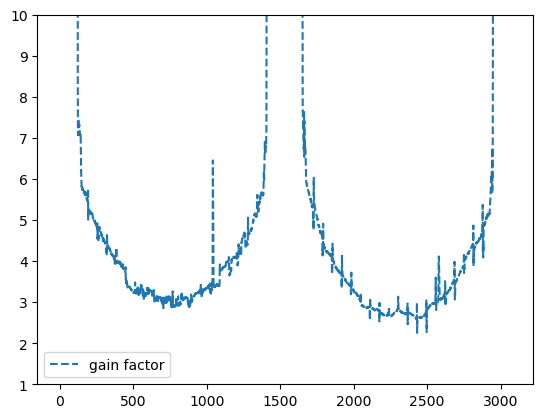

In [7]:
plt.plot(gainoff[:, 0], '--', label = 'gain factor')
# plt.plot(offset['Average'], '--', label = 'on site')
plt.ylim(1, 10)
plt.legend()

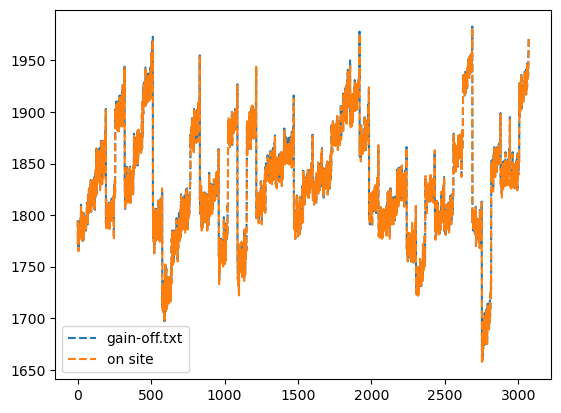

In [49]:
plt.plot(gainoff[:, 1], '--', label = 'gain-off.txt')
plt.plot(offset['Average'], '--', label = 'on site')
plt.legend()

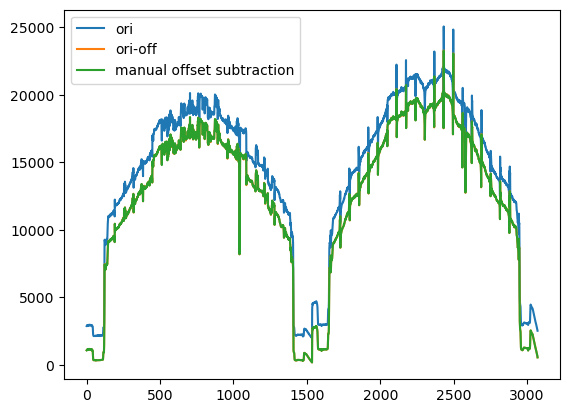

In [77]:
plt.plot(ori_without_off['Average'], label = 'ori')
plt.plot(ori_with_off['Average'], label = 'ori-off')
plt.plot(ori_without_off['Average'] - gainoff[:, 1], label = 'manual offset subtraction')
plt.legend()

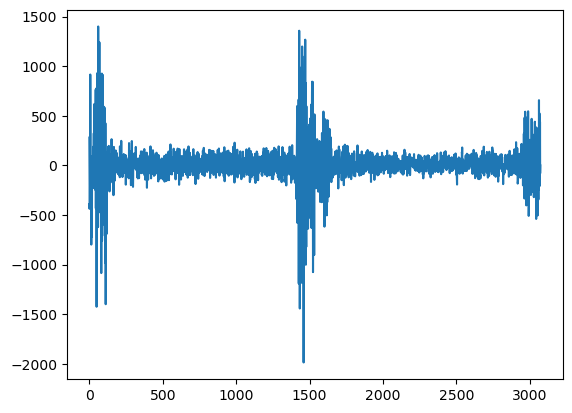

In [80]:
diff_ater_off = (ori_without_off['Average'] - gainoff[:, 1] - ori_with_off['Average'])*gainoff[:, 0]
plt.plot(diff_ater_off, label = 'manual offset subtraction')


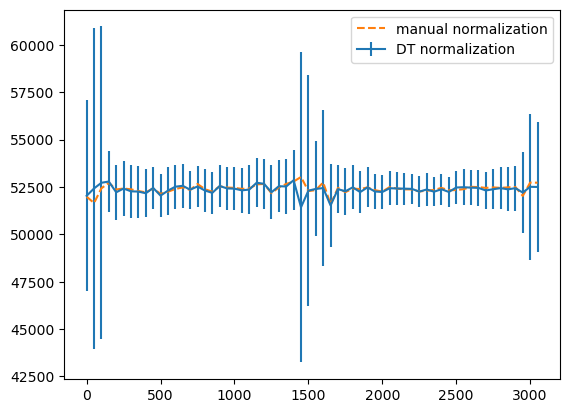

In [95]:
x1 = values_after_normalization['Average']; y1 = values_after_normalization['RMS']
x = np.arange(len(x1))
x2 = (ori_without_off['Average'] - gainoff[:, 1])*gainoff[:, 0]
plt.errorbar(x[::50], x1[::50], y1[::50], label = 'DT normalization')
# plt.plot(x1[::50], label = 'normalization')
plt.plot(x2[::50], '--', label = 'manual normalization')
# plt.ylim(50000, 55000)
plt.legend()

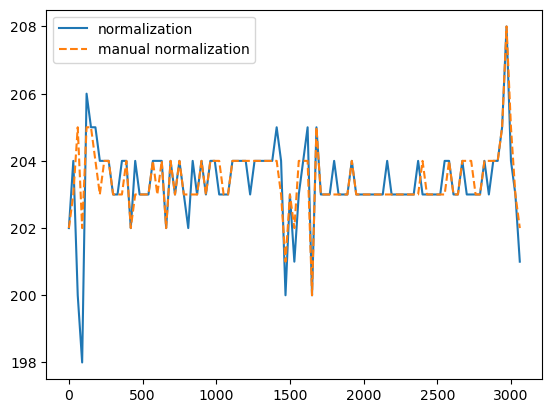

In [88]:
plt.plot(x[::30], convert_16_to_8(x1[::30].values), label = 'normalization')
plt.plot(x[::30], convert_16_to_8(x2[::30].values), '--', label = 'manual normalization')
plt.legend()

In [68]:
def convert_16_to_8(value_16bit):
    if isinstance(value_16bit, np.ndarray):  # 处理数组输入
        return (value_16bit / 65535 * 255).astype(np.uint8)
    else:  # 处理标量输入
        return int((value_16bit / 65535) * 255)


In [ ]:
data_new = os.path.abspath(os.path.join(current_dir, '..', '..', 'data', '20250604'))
stack_tif(data_new, height_factor = 6) 
sample_path = '/Users/zhengyun/Desktop/yaojian/data/20250604/sample_normalized/sample_normalized.png'
sample_norm, contoured_norm, image_norm, r_pixels_norm, contoured_r_norm, box_norm = get_bricks(sample_path, roi = [0, -1, 700, 900], th_val = 175)
